In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# provided helper functions
def U(x,y,A):
    N = np.size(A,axis=0)
    xaux = np.outer(x,np.ones_like(x))
    yaux = np.outer(y,np.ones_like(y))
    dx = A*(xaux - np.transpose(xaux))
    dy = A*(yaux - np.transpose(yaux))
    dxy = np.sqrt(dx**2 + dy**2)

    linkedInd = np.argwhere(A == 1)
    sum_linked = np.sum((dxy[linkedInd] - 1)**2)
    sum_linked /= 2

    unlinkedInd = np.argwhere(A == 0)
    sum_unlinked = np.sum((np.minimum(dxy[unlinkedInd] - np.sqrt(3), 0))**2)
    sum_unlinked /= 2

    return sum_linked + sum_unlinked


# forces
def forces(x,y,A):
    N = np.size(A,axis = 0)
    # find pairwise distances 
    xaux = np.outer(x,np.ones(np.shape(x)))
    yaux = np.outer(y,np.ones(np.shape(x)))
    dx = A*(xaux - np.transpose(xaux))
    dy = A*(yaux - np.transpose(yaux))
    dxy = np.sqrt(dx**2 + dy**2)
    # spring forces due to linked vertices
    # optimal distance between linked vertices is 1 
    Aind = np.argwhere(A == 1)
    idiff = np.zeros(np.shape(A))
    Nlinks = np.size(Aind,axis = 0)
    for j in range(Nlinks):
        idiff[Aind[j,0],Aind[j,1]] = 1 - 1/dxy[Aind[j,0],Aind[j,1]]
    
    fx = -np.sum(idiff*dx,axis = 1)
    afx = np.minimum(np.abs(fx),np.ones(np.size(fx)))
    sfx = np.sign(fx)
    fx = afx*sfx
                  
    fy = -np.sum(idiff*dy,axis = 1)
    afy = np.minimum(np.abs(fy),np.ones(np.size(fy)))
    sfy = np.sign(fy)
    fy = afy*sfy
    
    f_linked = np.concatenate((fx,fy),axis = 0)
    
    # repelling spring forces due to unlinked vertices
    # repelling is on if the distance between unlined verticas is greater than sqrt(3)
    h = np.sqrt(3.0)
    A1 = np.ones(np.shape(A)) - A
    dx = A1*(xaux - np.transpose(xaux))
    dy = A1*(yaux - np.transpose(yaux))
    dxy = np.sqrt(dx**2 + dy**2)
    mask = np.zeros(np.shape(A))
    diff = A1*(dxy - h)
    mask = np.minimum(diff,np.zeros(np.shape(diff)))
    fx = np.sum(mask*dx,axis=1)
    fy = np.sum(mask*dy,axis=1)
    f_unlinked = -np.concatenate((fx,fy),axis = 0)
    
    return np.reshape(f_linked + f_unlinked, (182,1))

# plot graph
def plot_graph(x,y,A):
    plt.figure(figsize=(12, 12))
    Aind = np.argwhere(A == 1)
    Nlinks = np.size(Aind,axis = 0)
    for j in range(Nlinks):
        plt.plot([x[Aind[j,0]],x[Aind[j,1]]],[y[Aind[j,0]],y[Aind[j,1]]],linewidth = 4,c = (0,0,0.5))
    plt.scatter(x,y,s=200,c='r')
    axes=plt.gca()
    axes.set_aspect(1)
    plt.axis('off')

In [4]:
# read CSV
AdjMatrix = pd.read_csv('Adjacency_matrix.csv', header=None)
AdjMatrix = AdjMatrix.to_numpy()

In [16]:
# initialize x and y
x = np.random.randn(91,1)*91
y = np.random.randn(91,1)*91
# initalize x and y averages for residuals
xAvgs = x
yAvgs = y 

In [12]:
U(x,y,AdjMatrix)

11857025.399627728

Initially ||F|| = 13.476676979668422
i = 500 ||F|| = 12.045130156470304 U(x,y) = 5926027.539648943
i = 1000 ||F|| = 10.618568215207263 U(x,y) = 2869664.1672490677
i = 1500 ||F|| = 7.857179911468739 U(x,y) = 2256453.667190759
i = 2000 ||F|| = 3.3378119797916015 U(x,y) = 2183690.6442685337
i = 2500 ||F|| = 1.6759357065513705 U(x,y) = 2180207.4066537204
i = 3000 ||F|| = 1.0873056699486516 U(x,y) = 2180020.241491911
i = 3500 ||F|| = 0.80268077615712 U(x,y) = 2180120.7544070384
i = 4000 ||F|| = 0.6206077032881295 U(x,y) = 2180172.8690638226


C:\Users\James\AppData\Local\Temp\ipykernel_23372\3252957674.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  residuals[j] = r


i = 4500 ||F|| = 0.49055191714161006 U(x,y) = 2180374.8112252974
i = 5000 ||F|| = 0.3930805996390959 U(x,y) = 2180656.9547418375
i = 5500 ||F|| = 0.3212140676105394 U(x,y) = 2180842.548760497
i = 6000 ||F|| = 0.2579927667402566 U(x,y) = 2181153.5467586885
i = 6500 ||F|| = 0.21011729341045987 U(x,y) = 2181478.8502370203
i = 7000 ||F|| = 0.1719438677261598 U(x,y) = 2181760.2024465995
i = 7500 ||F|| = 0.14062337247628673 U(x,y) = 2182056.164789573
i = 8000 ||F|| = 0.11484816322117086 U(x,y) = 2182351.5933212866
i = 8500 ||F|| = 0.09409501960657495 U(x,y) = 2182639.9037499283
i = 9000 ||F|| = 0.07772930775767356 U(x,y) = 2182886.6295299386
i = 9500 ||F|| = 0.06599065359275201 U(x,y) = 2183083.9720261395
i = 10000 ||F|| = 0.05764680832414928 U(x,y) = 2183256.9039844293
i = 10500 ||F|| = 0.046474598501773746 U(x,y) = 2183429.9748791982
i = 11000 ||F|| = 0.03827587067212366 U(x,y) = 2183583.4902000856
i = 11500 ||F|| = 0.03420986365845801 U(x,y) = 2183683.4212263417
i = 12000 ||F|| = 0.029020

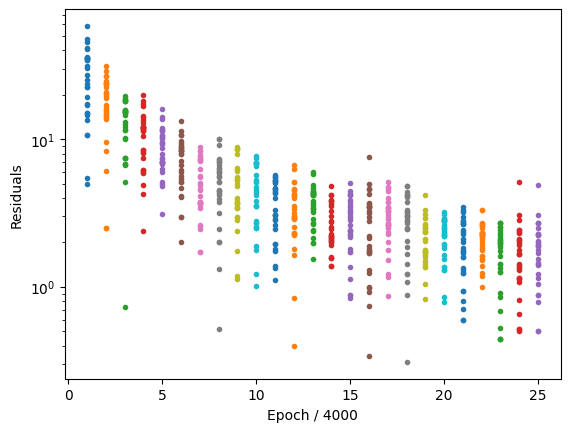

In [17]:
# Nesterov Optimizer
no_epochs = 100000
resid_interval = int(no_epochs / 25)
alpha = 1e-2
m = 0.9
last_change = np.zeros((182,1))

res_Fig = plt.figure()
xAxisStr = "Epoch / " + str(resid_interval)
plt.xlabel(xAxisStr)
plt.ylabel('Residuals')
plt.yscale('log')

g = -forces(x,y,AdjMatrix)
Fs = np.zeros((no_epochs+1,1))
Fs[0] = np.linalg.norm(g)
print("Initially ||F|| = " + str(np.linalg.norm(g)))
for i in range(1,no_epochs+1):
    projX = x + last_change[0:91]*m
    projY = y + last_change[91:182]*m
    g = -forces(projX, projY,AdjMatrix)
    last_change = (m*last_change) - alpha*g
    x = x + last_change[0:91]
    y = y + last_change[91:182]
    Fs[i] = np.linalg.norm(g)
    xAvgs = (i * xAvgs + x)/(i + 1)
    yAvgs = (i * yAvgs + y)/(i + 1)
    if i % (no_epochs / 200) == 0:
        print("i = " + str(i) + " ||F|| = " + str(np.linalg.norm(g)) + " U(x,y) = " + str(U(x,y,AdjMatrix)))
    # plot the residuals
    if i % resid_interval == 0:
        graphX = np.ones((30,1))*int(i / resid_interval)
        resid_index = np.random.choice(range(0,91), (30,))
        x_res = x[resid_index] - xAvgs[resid_index]
        y_res = y[resid_index] - yAvgs[resid_index]
        residuals = np.zeros((30,))
        for j in range(30):
            r = np.sqrt(x_res[j]**2 + y_res[j]**2)
            residuals[j] = r 
        plt.plot(graphX, residuals, '.')
        res_Fig.canvas.draw()


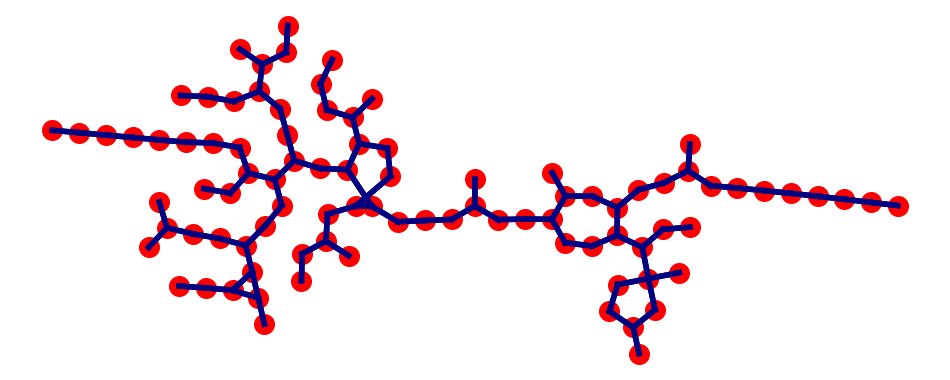

In [18]:
plot_graph(x,y,AdjMatrix)

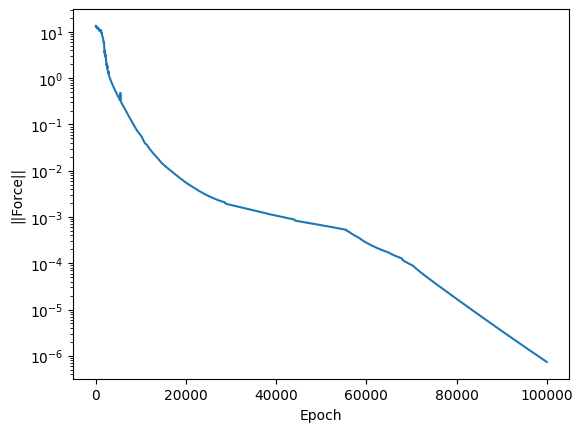

In [19]:
plt.plot(range(0,no_epochs+1), Fs)
plt.xlabel("Epoch")
plt.ylabel("||Force||")
plt.yscale("log")